<a href="https://colab.research.google.com/github/ORCT/ds-section2-project/blob/main/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from ipywidgets import interact
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic')

In [3]:
df = pd.read_csv('main_df_fin.csv')
df

,Match_Id,Track,Name,Rank,Time,Kart,드리프트,가속력,코너링,부스터시간,부스터충전량
0,Color맥라렌/1,차이나 라사,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
1,Color맥라렌/1,차이나 라사,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
2,Color맥라렌/1,차이나 라사,하이럼스미스,3.0,110.66,나이트 세이버 V1,1050.0,1024.0,965.0,950.0,600.0
3,Color맥라렌/2,네모 장난감 선물공장,Color맥라렌,1.0,110.03,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
4,Color맥라렌/2,네모 장난감 선물공장,KR퀵서비스,2.0,110.04,프로토 바이크 V1,940.0,1000.0,885.0,780.0,880.0
...,...,...,...,...,...,...,...,...,...,...,...
9047,까이브/99,월드 이탈리아 피사의 사탑,l지존지후l,4.0,69.49,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
9048,까이브/100,월드 두바이 다운타운,YJWP,1.0,67.20,렉키 V1,1020.0,1020.0,965.0,780.0,880.0
9049,까이브/100,월드 두바이 다운타운,뱩소현,2.0,67.25,스펙터 V1,1105.0,1105.0,1040.0,1005.0,490.0
9050,까이브/100,월드 두바이 다운타운,까이브,3.0,69.02,렉키 V1,1020.0,1020.0,965.0,780.0,880.0


기준 모델의 설정이 필요함

아마 선형회귀일테니 타겟의 평균값

능력치의 단순합으로 한 번 계산해볼까
스캐터플롯 한 번 찍어보자고

In [4]:
df['성능합'] = df['드리프트'] + df['가속력'] + df['코너링'] + df['부스터시간'] + df['부스터충전량']

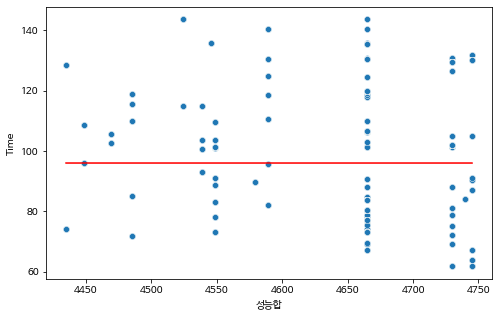

In [5]:
plt.figure(figsize=(8,5))
predict = df['Time'].mean()
sns.lineplot(x=df['성능합'], y=predict, color='red')

sns.scatterplot(x=df['성능합'], y=df['Time'])

plt.show()

딱히 의미없는 형태... 아 그리고 비주얼라이즈 저장안됐더라... 조짐...

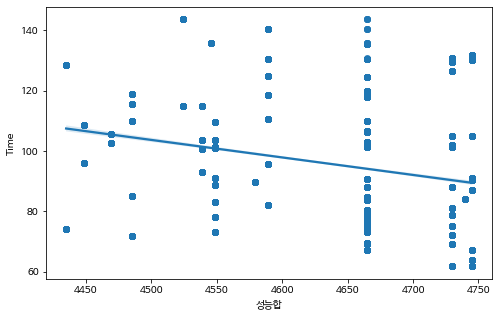

In [6]:
plt.figure(figsize=(8,5))
sns.regplot(x='성능합', y='Time', data=df)

그래도 성능이 오를 수록 내려가는 모습은 보이네 허허...

In [7]:
feature = ['성능합']
target = 'Time'

X = df[feature]
y = df[target]

print(X.shape)
print(y.shape)

(9052, 1)
(9052,)


In [8]:
simple_ols = LinearRegression()
simple_ols.fit(X, y)

LinearRegression()

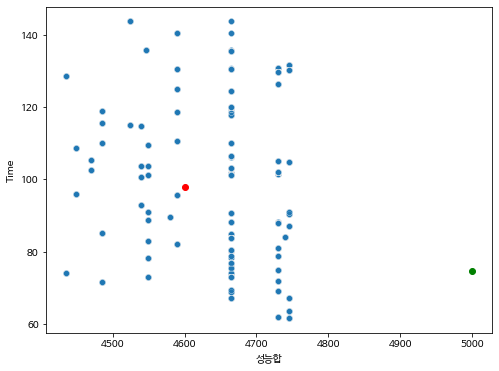

In [9]:
interpolate_x = [[4600]]
interpolate_y = simple_ols.predict(interpolate_x)[0]

extrapolate_x = [[5000]]
extrapolate_y = simple_ols.predict(extrapolate_x)[0]

plt.figure(figsize=(8,6))
sns.scatterplot(x=df['성능합'], y=df['Time'], alpha=0.6)

plt.scatter(interpolate_x, interpolate_y, color='red')
plt.scatter(extrapolate_x, extrapolate_y, color='green')

plt.show()

따로 트랙을 나눠주지 않고 나이브하게 단순선형회귀로 확인했을 때도 감소하는 형태가 나온다는게 좀 신기하긴 하네

In [10]:
features = ['Track', '성능합']
target = 'Time'

X = df[features]
y = df[target]

print(X.shape)
print(y.shape)

(9052, 2)
(9052,)


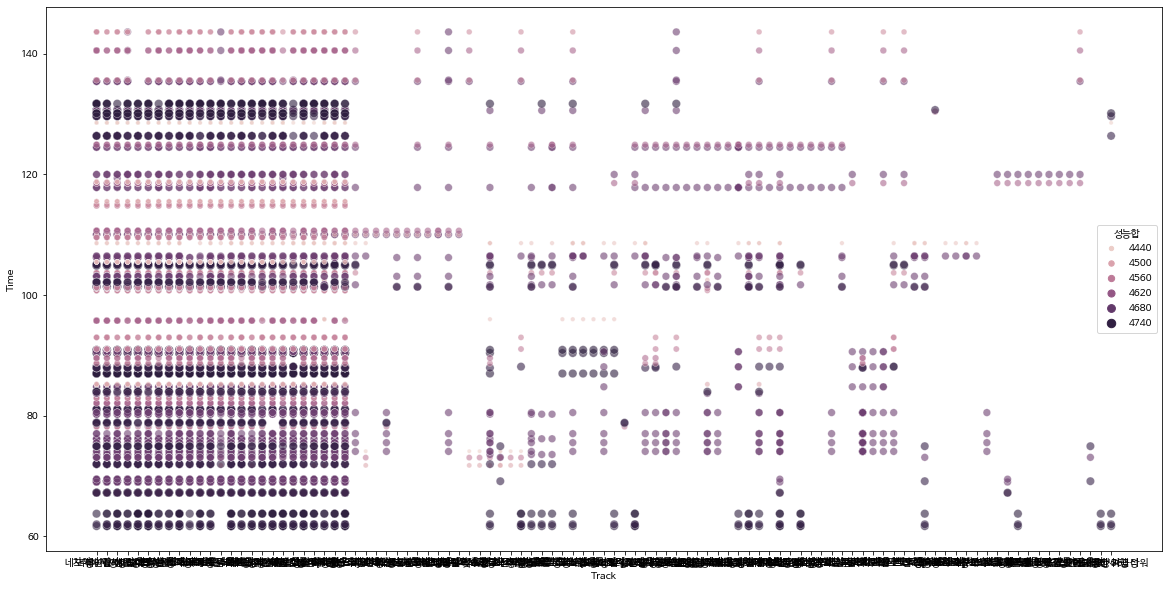

In [11]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Track'], y=df['Time'], hue=df['성능합'], size=df['성능합'], alpha=0.6)
plt.show()

상당히 복잡하게 되어있고, 솔직하게 말해서 성능이 높은 차량이 항상 맨 아래에 있진 않다. 근데 확실히 아래쪽에 비중이 높아 성능이 높은 애들이

트랙 이름이 너무 길어서 플롯이 안예뻐...

In [12]:
# multiple_ols = LinearRegression()
# multiple_ols.fit(X, y)#이거도 결국 맵 때문에 안되네 여기서 인코더를 써야하나보다

In [13]:
print('coefficient :', simple_ols.coef_)
print('intercept :', simple_ols.intercept_)

coefficient : [-0.05806819]
intercept : 364.9645077193361


In [14]:
print(f'선형회귀식 : y = 성능합 * {simple_ols.coef_[0]:.3f} + {simple_ols.intercept_:.3f}')

선형회귀식 : y = 성능합 * -0.058 + 364.965


회귀계수는 성능합이 1 오를 때 마다 평균 기록은 0.058초씩 감소한다.


In [15]:
def explain_prediction(spec):
  y_pred = simple_ols.predict([[spec]])
  pred = f'{spec} 성능합 기록 예측 : {y_pred[0]} (성능합 1증가당 기록 감소 : {simple_ols.coef_[0]:.3f})'
  return pred

In [16]:
print(explain_prediction(4500))

4500 성능합 기록 예측 : 103.65766166795618 (성능합 1증가당 기록 감소 : -0.058)


In [17]:
@interact
def explain_prediction(spec=(4000,5000)):
  y_pred = simple_ols.predict([[spec]])
  pred = f'{spec} 성능합 기록 예측 : {y_pred[0]} (성능합 1증가당 기록 감소 : {simple_ols.coef_[0]:.3f})'
  return pred

interactive(children=(IntSlider(value=4500, description='spec', max=5000, min=4000), Output()), _dom_classes=(…

In [18]:
train, test = train_test_split(df, test_size=0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

print(train.shape, val.shape, test.shape)

(5792, 12) (1449, 12) (1811, 12)


In [19]:
num_features = df.dtypes[df.dtypes != 'object'].index
df[num_features].corr()['Time'].sort_values(ascending=False)

Time      1.000000
Rank      0.132766
부스터시간     0.054923
가속력      -0.055326
드리프트     -0.093682
부스터충전량   -0.098321
코너링      -0.161547
성능합      -0.250106
Name: Time, dtype: float64

이거 좀 궁금한게, 성능합이 높을수록 타임은 떨어지거든? 이렇게 음의 방향으로 비례하는 경우에는 상관계수가 높은게 좋은거냐?

해보자 그럼 상관계수 높은거 2개, 낮은 거 2개 뽑아서 각각 학습 시켜 보면 되지

In [20]:
target = 'Time'
h_features = ['Rank', '부스터시간']
l_features = ['성능합', '코너링']

def xy_split(df, features):
  X = df[features]
  y = df[target]
  return X, y

X_train_h, y_train_h = xy_split(train, h_features)
X_val_h, y_val_h = xy_split(val, h_features)
X_test_h, y_test_h = xy_split(test, h_features)

X_train_l, y_train_l = xy_split(train, l_features)
X_val_l, y_val_l = xy_split(val, l_features)
X_test_l, y_test_l = xy_split(test, l_features)

In [21]:
pd.options.display.float_format = '{:,.3f}'.format

def eval_models(y_true, y_pred) :
    mse = mean_squared_error(y_true, y_pred).round(3)
    rmse = np.sqrt(mse).round(3)
    mae = mean_absolute_error(y_true, y_pred).round(3)
    r2 = r2_score(y_true, y_pred)

    return mse, rmse, mae, r2

baseline_h = [y_train_h.mean()] * len(y_train_h)
eval_models(baseline_h, y_train_h)

baseline_l = [y_train_l.mean()] * len(y_train_l)
eval_models(baseline_l, y_train_l)

(458.5, 21.413, 18.334, -2.2703825411630804e+30)

In [22]:
model_h = LinearRegression()
model_h.fit(X_train_h, y_train_h)

y_train_h_pred = model_h.predict(X_train_h)
y_val_h_pred = model_h.predict(X_val_h)
y_test_h_pred = model_h.predict(X_test_h)

In [23]:
model_l = LinearRegression()
model_l.fit(X_train_l, y_train_l)

y_train_l_pred = model_l.predict(X_train_l)
y_val_l_pred = model_l.predict(X_val_l)
y_test_l_pred = model_l.predict(X_test_l)

In [24]:
comparison_h = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base', 'Train', 'Validation', 'Test'])
comparison_h['Base'] = eval_models(y_train_h, baseline_h)
comparison_h['Train'] = eval_models(y_train_h, y_train_h_pred)
comparison_h['Validation'] = eval_models(y_val_h, y_val_h_pred)
comparison_h['Test'] = eval_models(y_test_h, y_test_h_pred)

comparison_l = pd.DataFrame(index=['mse', 'rmse', 'mae', 'r2'], columns=['Base', 'Train', 'Validation', 'Test'])
comparison_l['Base'] = eval_models(y_train_l, baseline_l)
comparison_l['Train'] = eval_models(y_train_l, y_train_l_pred)
comparison_l['Validation'] = eval_models(y_val_l, y_val_l_pred)
comparison_l['Test'] = eval_models(y_test_l, y_test_l_pred)

In [25]:
comparison_h

,Base,Train,Validation,Test
mse,458.500,450.091,477.712,428.513
rmse,21.413,21.215,21.857,20.701
mae,18.334,18.251,18.849,17.857
r2,0.000,0.018,0.027,0.014


In [26]:
comparison_l

,Base,Train,Validation,Test
mse,458.500,428.998,454.040,407.200
rmse,21.413,20.712,21.308,20.179
mae,18.334,17.121,17.754,16.641
r2,0.000,0.064,0.075,0.063


다른 오차는 근소하게 로우 피쳐들이 좋지만 r2에서 로우 피쳐가 압도적으로 좋은 모습을 보여준다.

따라서 이렇게 음의 비례를 가지는 경우에는 상관계수가 낮게 나오는 쪽이 오히려 특성간 상관관계가 높다고 볼 수 있겠다.

아 근데 성능합은 그냥 다른 성능들 다 합친거라서 나중에 쓸 때는 성능합은 빼놓고 하던가 해. 저거는 그냥 리니어리그레션 보기만 하려고 넣은거니까 아마 과적합 날거 같아

부스터 지속시간이 상관계수가 낮은 건 의외긴 해

데이터가 1만개... 크로스 밸리데이션 한 번 써보지 뭐

In [27]:
for i in range(1,30, 5) :
    train_sk, val_sk = train_test_split(train, test_size=0.25, random_state=i)
    X_train, y_train = xy_split(train_sk, l_features)
    X_val, y_val = xy_split(val_sk, l_features)

    model_l.fit(X_train, y_train)

    y_train_pred = model_l.predict(X_train)
    y_val_pred = model_l.predict(X_val)

    print(f'train result of random_state {i}:',mean_absolute_error(y_train, y_train_pred).round(2))
    print(f'validation result of random_state {i}:',mean_absolute_error(y_val, y_val_pred).round(2))
    print('---------------------------------------------------------------')

train result of random_state 1: 17.16
validation result of random_state 1: 17.01
---------------------------------------------------------------
train result of random_state 6: 17.24
validation result of random_state 6: 16.84
---------------------------------------------------------------
train result of random_state 11: 17.18
validation result of random_state 11: 16.95
---------------------------------------------------------------
train result of random_state 16: 17.47
validation result of random_state 16: 16.35
---------------------------------------------------------------
train result of random_state 21: 17.16
validation result of random_state 21: 17.09
---------------------------------------------------------------
train result of random_state 26: 17.22
validation result of random_state 26: 16.81
---------------------------------------------------------------


In [28]:
kf = KFold(n_splits=5)
print('k =', kf.get_n_splits())

cv_result = []
for train_idx, test_idx in kf.split(X_train_l) :
    X_train_cv, X_val_cv = X_train_l.iloc[train_idx], X_train_l.iloc[test_idx]
    y_train_cv, y_val_cv = y_train_l.iloc[train_idx], y_train_l.iloc[test_idx]

    # 위에서 선언한 linear regression
    model_l.fit(X_train_cv, y_train_cv)

    # 모델 예측
    y_pred_cv = model_l.predict(X_val_cv)

    # mae를 구해보겠습니다.
    mae_cv = mean_absolute_error(y_val_cv, y_pred_cv).round(2)
    cv_result.append(mae_cv)

print('mae for each fold : ', cv_result)
print('average mae for model : ', np.mean(cv_result).round(2))
print('std of result : ', np.std(cv_result).round(2))

k = 5
mae for each fold :  [17.04, 16.99, 16.99, 17.08, 17.55]
average mae for model :  17.13
std of result :  0.21


이게 크로스 밸 스코어가 kfold를 안써도 아 그건 아니네

In [29]:
cv_results = cross_val_score(
    model_l, 
    X_train_cv, 
    y_train_cv, 
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1
    )


print('mae for each fold : ', -np.round(cv_results, 2))
print('average mae for model : ', -np.mean(cv_results).round(2))
print('std of result : ', np.std(cv_results).round(2))

mae for each fold :  [17.19 16.8  17.09 16.52 17.35]
average mae for model :  16.99
std of result :  0.3


과적합 방지용 드랍 칼럼 : Match_Id, Name

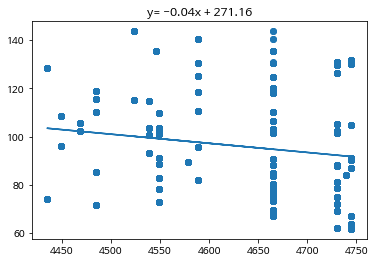

In [30]:
ridge = Ridge(alpha=0.5, normalize=True)
ridge.fit(X_train_l[['성능합']], y_train_l)
y_pred_ridge = ridge.predict(X_train_l[['성능합']])

plt.scatter(X_train_l['성능합'], y_train_l)
plt.plot(X_train_l['성능합'], y_pred_ridge)
plt.title(f'y= {ridge.coef_[0].round(2)}x + {ridge.intercept_.round(2)}')

plt.show()

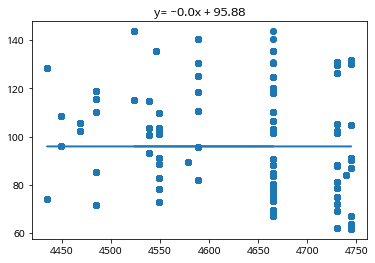

In [33]:
lasso = Lasso(alpha=0.5, normalize=True)
lasso.fit(X_train_l[['성능합']], y_train_l)
y_pred_ridge = lasso.predict(X_train_l[['성능합']])

plt.scatter(X_train_l['성능합'], y_train_l)
plt.plot(X_train_l['성능합'], y_pred_ridge)
plt.title(f'y= {lasso.coef_[0].round(2)}x + {lasso.intercept_.round(2)}')

plt.show()

라소가 영향력이 안큰 회귀계수를 0으로 만들어서 이게 모조리 이런식으로 나오는 건가... 일단 이거는 테스트용으로 피쳐를 두 개만 넣어놓은거라서 나중에 한 번 전체적으로 손을 좀 보자고